#### Importing necessary libraries

In [29]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
import openpyxl

import plotly.express as px
import plotly.graph_objects as go

import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

### Loading the primary dataset

In [30]:
pop = pd.read_excel(r'Religious_Composition_by_Country_2010-2050.xlsx')

C:\Users\adeel\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



In [31]:

# # Specify the URL
# url = 'https://www.pewresearch.org/religion/wp-content/uploads/sites/7/2023/02/Religious_Composition_by_Country_2010-2050.xlsx'

# link = requests.get(url)

# if link.status_code == 200:
#     # Convert the link content to a Pandas DataFrame
#     pop = pd.read_excel(link.content)

#     #print(pop.head())
# else:
#     print("Error: Failed to download the dataset")


In [32]:
pop.head()

,row_number,level,Nation_fk,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,All Religions
0,1,3,10000,2010,World,All Countries,"2,168,330,000","1,599,700,000","1,131,150,000","1,032,210,000","487,760,000","404,690,000","58,150,000","13,860,000","6,895,850,000"
1,2,2,1001,2010,North America,All Countries,"266,630,000","3,480,000","59,040,000","2,250,000","3,860,000","1,020,000","2,200,000","6,040,000","344,530,000"
2,3,2,1002,2010,Latin America-Caribbean,All Countries,"531,280,000","840,000","45,390,000","660,000","410,000","10,040,000","990,000","470,000","590,080,000"
3,4,2,1003,2010,Europe,All Countries,"553,280,000","43,470,000","139,890,000","1,380,000","1,350,000","870,000","890,000","1,420,000","742,550,000"
4,5,2,1004,2010,Middle East-North Africa,All Countries,"12,710,000","317,070,000","2,100,000","1,720,000","500,000","1,060,000","230,000","5,630,000","341,020,000"


##### Cleaning the data

In [33]:
# Cleaning the dataframe. Removing commas from numeric values. 
# Populations less than 10K are equated to 10K for easier calculations.

pop['Muslims'] = pop['Muslims'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop['Christians'] = pop['Christians'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop['Unaffiliated'] = pop['Unaffiliated'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop['Hindus'] = pop['Hindus'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop['Buddhists'] = pop['Buddhists'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop['Folk Religions'] = pop['Folk Religions'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop['Other Religions'] = pop['Other Religions'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop['Jews'] = pop['Jews'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop['All Religions'] = pop['All Religions'].apply(lambda x: str(x).replace('<', '').replace(',', ''))
pop.drop(['row_number','level','Nation_fk'], axis = 1, inplace = True)
pop[['Christians','Muslims','Hindus','Unaffiliated','Buddhists','Folk Religions','Other Religions','Jews','All Religions']] = pop[['Christians','Muslims','Hindus','Unaffiliated','Buddhists','Folk Religions','Other Religions','Jews','All Religions']].astype(float)
pop


,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,All Religions
0,2010,World,All Countries,2.168330e+09,1.599700e+09,1.131150e+09,1.032210e+09,487760000.0,404690000.0,58150000.0,13860000.0,6.895850e+09
1,2010,North America,All Countries,2.666300e+08,3.480000e+06,5.904000e+07,2.250000e+06,3860000.0,1020000.0,2200000.0,6040000.0,3.445300e+08
2,2010,Latin America-Caribbean,All Countries,5.312800e+08,8.400000e+05,4.539000e+07,6.600000e+05,410000.0,10040000.0,990000.0,470000.0,5.900800e+08
3,2010,Europe,All Countries,5.532800e+08,4.347000e+07,1.398900e+08,1.380000e+06,1350000.0,870000.0,890000.0,1420000.0,7.425500e+08
4,2010,Middle East-North Africa,All Countries,1.271000e+07,3.170700e+08,2.100000e+06,1.720000e+06,500000.0,1060000.0,230000.0,5630000.0,3.410200e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2050,Sub-Saharan Africa,Zimbabwe,1.623000e+07,2.000000e+05,1.430000e+06,1.000000e+04,10000.0,930000.0,50000.0,10000.0,1.885000e+07
1201,2050,Sub-Saharan Africa,South Sudan,1.275000e+07,1.300000e+06,1.000000e+05,1.000000e+04,10000.0,6930000.0,10000.0,10000.0,2.108000e+07
1202,2050,Latin America-Caribbean,Curacao,1.700000e+05,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.0,10000.0,10000.0,1.800000e+05
1203,2050,Latin America-Caribbean,Sint Maarten,6.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.0,10000.0,10000.0,6.000000e+04


In [34]:
# Viewing worldwide religious demographics
world = pop[pop['Region']==' World']
world

,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,All Religions
0,2010,World,All Countries,2.168330e+09,1.599700e+09,1.131150e+09,1.032210e+09,487760000.0,404690000.0,58150000.0,13860000.0,6.895850e+09
241,2020,World,All Countries,2.382750e+09,1.907110e+09,1.193750e+09,1.161440e+09,506990000.0,429640000.0,60990000.0,14660000.0,7.657330e+09
482,2030,World,All Countries,2.578790e+09,2.209270e+09,1.233020e+09,1.267290e+09,511300000.0,445490000.0,62490000.0,15260000.0,8.322920e+09
723,2040,World,All Countries,2.756390e+09,2.497830e+09,1.244190e+09,1.342680e+09,503940000.0,451910000.0,62550000.0,15700000.0,8.875200e+09
964,2050,World,All Countries,2.918070e+09,2.761480e+09,1.230340e+09,1.384360e+09,486270000.0,449140000.0,61450000.0,16090000.0,9.307190e+09


### Loading Additional Datasets

##### Dataset for ISO codes

In [35]:
iso_codes = pd.read_excel(r'iso_codes.xlsx')

In [36]:
# url1 = 'https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/raw/master/all/all.csv'


# link1 = requests.get(url1)

# if link1.status_code == 200:  
    
#     iso_codes = pd.read_csv(io.StringIO(link1.content.decode('utf-8')), on_bad_lines = 'skip')

# else:
#     print("Error: Failed to download the dataset")


In [37]:
iso_codes

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Unnamed: 11
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142,34.0,NaN,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150,154.0,NaN,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150,39.0,NaN,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2,15.0,NaN,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9,61.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9,61.0,NaN,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2,15.0,NaN,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142,145.0,NaN,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2,202.0,14.0,NaN


In [38]:
# editing names of countries to match with original dataset country names
# to get corresponding iso_codes for each country for plotting choropleth maps

iso_codes['name'] = ['Afghanistan', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire',
       'Bosnia-Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Republic of the Congo','Democratic Republic of the Congo', 
        'Cook Islands', 'Costa Rica',"Côte d'Ivoire", 'Croatia',
        'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands (Malvinas)',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'French Southern Territories', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece',
       'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala',
       'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Heard Island and McDonald Islands', 'Holy See', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati',
       'North Korea', ' South Korea', 'Kuwait',
       'Kyrgyzstan', "Laos", 'Latvia',
       'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macau', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands',
       'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico',
       'Micronesia (Federated States of)', 'Moldova', 'Monaco',
       'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands',
       'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
       'Niue', 'Norfolk Island', 'North Macedonia',
       'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau',
       'Palestinian territories', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico',
       'Qatar', 'Reunion', 'Romania', 'Russia', 'Rwanda',
       'St. Barthélemy', 'St. Helena', 'St. Kitts and Nevis',
       'St. Lucia', 'St. Martin (French part)',
       'St. Pierre and Miquelon', 'St. Vincent and the Grenadines',
       'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa',
       'South Georgia and the South Sandwich Islands', 'South Sudan',
       'Spain', 'Sri Lanka', 'Sudan', 'Suriname',
       'Svalbard and Jan Mayen', 'Sweden', 'Switzerland',
       'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
       'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
       'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates',
       'United Kingdom',
       'United States', 'United States Minor Islands',
       'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam',
       'Virgin Islands (British)', 'U.S. Virgin Islands',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe']



In [39]:
# dropping rows with Country = All Countries
all_con_ind = pop[pop['Country']==' All Countries'].index
pop_countries = pop.drop(all_con_ind, axis = 0)



In [40]:
# merging orginal dataframe with iso_codes 

pop_codes = pop_countries.merge(iso_codes, how='left', left_on=['Country'], right_on=['name'])
pop_codes.rename(columns={'alpha-3':'iso_alpha'}, inplace=True)

pop_codes= pop_codes[['Year','Region','Country','Christians','Muslims','Unaffiliated','Hindus','Buddhists','Folk Religions','Other Religions', 'Jews',
       'All Religions', 'iso_alpha', 'country-code']]

pop_codes

,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,All Religions,iso_alpha,country-code
0,2010,Asia-Pacific,Afghanistan,30000.0,31330000.0,10000.0,10000.0,10000.0,10000.0,20000.0,10000.0,31410000.0,AFG,4
1,2010,Europe,Albania,580000.0,2570000.0,50000.0,10000.0,10000.0,10000.0,10000.0,10000.0,3200000.0,ALB,8
2,2010,Middle East-North Africa,Algeria,60000.0,34730000.0,660000.0,10000.0,10000.0,10000.0,10000.0,10000.0,35470000.0,DZA,12
3,2010,Asia-Pacific,American Samoa,50000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,60000.0,ASM,16
4,2010,Europe,Andorra,70000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,80000.0,AND,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2050,Sub-Saharan Africa,Zimbabwe,16230000.0,200000.0,1430000.0,10000.0,10000.0,930000.0,50000.0,10000.0,18850000.0,ZWE,716
1166,2050,Sub-Saharan Africa,South Sudan,12750000.0,1300000.0,100000.0,10000.0,10000.0,6930000.0,10000.0,10000.0,21080000.0,SSD,728
1167,2050,Latin America-Caribbean,Curacao,170000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,180000.0,NaN,NaN
1168,2050,Latin America-Caribbean,Sint Maarten,60000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,60000.0,NaN,NaN


##### Dataset for geographical coordinates

In [41]:
geo_codes = pd.read_csv(r'countries_codes_and_coordinates.csv')

In [42]:
# url2 = 'https://gist.github.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv'


# link2 = requests.get(url2)

# if link2.status_code == 200:  
    
#     geo_codes = pd.read_csv(io.StringIO(link2.content.decode('utf-8')), on_bad_lines = 'skip')

# else:
#     print("Error: Failed to download the dataset")




In [43]:
geo_codes

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""
...,...,...,...,...,...,...
251,Wallis and Futuna,"""WF""","""WLF""","""876""","""-13.3""","""-176.2"""
252,Western Sahara,"""EH""","""ESH""","""732""","""24.5""","""-13"""
253,Yemen,"""YE""","""YEM""","""887""","""15""","""48"""
254,Zambia,"""ZM""","""ZMB""","""894""","""-15""","""30"""


In [44]:
# Cleaning geo_codes and merging with previously creating dataset with population counts

for i, col in enumerate(geo_codes.columns):
    
    geo_codes.iloc[:, i] = geo_codes.iloc[:, i].str.replace('"', '')

geo_codes['Country'] = geo_codes['Country'].replace(['Congo', 'Congo, the Democratic Republic of the', 'Holy See (Vatican City State)', 
                                                    "Korea, Democratic People's Republic of",'Iran, Islamic Republic of','Palestinian Territory, Occupied',
                                                     'Burma', "Lao People's Democratic Republic",'Macedonia, the former Yugoslav Republic of',
                                                     'Tanzania, United Republic of'
                                                    ], 
                                                    ['Republic of the Congo', 'Democratic Republic of the Congo', 'Vatican City',
                                                     'North Korea','Iran','Palestinian territories','Burma (Myanmar)', 'Laos',
                                                     'Republic of Macedonia', 'Tanzania'
                                                    ])
    
dfg = pop_codes.merge(geo_codes, how='left', left_on=['Country'], right_on=['Country'])
dfg


,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,All Religions,iso_alpha,country-code,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,2010,Asia-Pacific,Afghanistan,30000.0,31330000.0,10000.0,10000.0,10000.0,10000.0,20000.0,10000.0,31410000.0,AFG,4,AF,AFG,4,33,65
1,2010,Europe,Albania,580000.0,2570000.0,50000.0,10000.0,10000.0,10000.0,10000.0,10000.0,3200000.0,ALB,8,AL,ALB,8,41,20
2,2010,Middle East-North Africa,Algeria,60000.0,34730000.0,660000.0,10000.0,10000.0,10000.0,10000.0,10000.0,35470000.0,DZA,12,DZ,DZA,12,28,3
3,2010,Asia-Pacific,American Samoa,50000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,60000.0,ASM,16,AS,ASM,16,-14.3333,-170
4,2010,Europe,Andorra,70000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,80000.0,AND,20,AD,AND,20,42.5,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2050,Sub-Saharan Africa,Zimbabwe,16230000.0,200000.0,1430000.0,10000.0,10000.0,930000.0,50000.0,10000.0,18850000.0,ZWE,716,ZW,ZWE,716,-20,30
1166,2050,Sub-Saharan Africa,South Sudan,12750000.0,1300000.0,100000.0,10000.0,10000.0,6930000.0,10000.0,10000.0,21080000.0,SSD,728,SS,SSD,728,8,30
1167,2050,Latin America-Caribbean,Curacao,170000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168,2050,Latin America-Caribbean,Sint Maarten,60000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,60000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [45]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1205 non-null   int64  
 1   Region           1205 non-null   object 
 2   Country          1205 non-null   object 
 3   Christians       1205 non-null   float64
 4   Muslims          1205 non-null   float64
 5   Unaffiliated     1205 non-null   float64
 6   Hindus           1205 non-null   float64
 7   Buddhists        1205 non-null   float64
 8   Folk Religions   1205 non-null   float64
 9   Other Religions  1205 non-null   float64
 10  Jews             1205 non-null   float64
 11  All Religions    1205 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 113.1+ KB


In [46]:
pop.describe()

,Year,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,All Religions
count,1205.000000,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03,1.205000e+03
mean,2030.000000,3.187834e+07,2.732775e+07,1.502062e+07,1.541210e+07,6.220664e+06,5.433477e+06,7.657759e+05,1.958672e+05,1.022204e+08
std,14.148007,1.836824e+08,1.715920e+08,1.060028e+08,1.348549e+08,4.787220e+07,4.166840e+07,5.476515e+06,1.270617e+06,6.281590e+08
min,2010.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
25%,2020.000000,1.300000e+05,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,5.100000e+05
50%,2030.000000,1.210000e+06,1.600000e+05,8.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,6.330000e+06
75%,2040.000000,8.100000e+06,3.740000e+06,1.000000e+06,2.000000e+04,2.000000e+04,1.800000e+05,3.000000e+04,1.000000e+04,2.871000e+07
max,2050.000000,2.918070e+09,2.761480e+09,1.244190e+09,1.384360e+09,5.113000e+08,4.519100e+08,6.255000e+07,1.609000e+07,9.307190e+09


##### Analysing distribution of religions across regions

In [47]:
pop_regions = pop.drop([0,241,482,723,964], axis = 0)
pop_regions_all_countries = pop_regions[pop_regions['Country']==' All Countries']

world_index = pop_regions_all_countries[pop_regions_all_countries['Region']==' World'].index

pop_regions_all_countries_final = pop_regions_all_countries.drop(world_index)
pop_regions_all_countries_final.drop(['Country'], axis = 1, inplace = True)


df_regions_year = pop_regions_all_countries_final.groupby(['Year','Region']).sum()
df_regions_year

# Total population count of each religion in each Region at the start of each decade

Christians       Muslims  Unaffiliated  \
Year Region                                                               
2010 Asia-Pacific              2.871000e+08  9.864200e+08   858490000.0   
     Europe                    5.532800e+08  4.347000e+07   139890000.0   
     Latin America-Caribbean   5.312800e+08  8.400000e+05    45390000.0   
     Middle East-North Africa  1.271000e+07  3.170700e+08     2100000.0   
     North America             2.666300e+08  3.480000e+06    59040000.0   
     Sub-Saharan Africa        5.173200e+08  2.484200e+08    26240000.0   
2020 Asia-Pacific              3.198300e+08  1.139990e+09   887840000.0   
     Europe                    5.349700e+08  5.047000e+07   148410000.0   
     Latin America-Caribbean   5.858500e+08  8.900000e+05    52430000.0   
     Middle East-North Africa  1.460000e+07  3.811400e+08     2480000.0   
     North America             2.772700e+08  4.890000e+06    71270000.0   
     Sub-Saharan Africa        6.502400e+08  3.297400e+08    31330000.0   
2030 Asia-Pacific              3.468400e+08  1.273030e+09   894150000.0   
     Europe                    5.101100e+08  5.718000e+07   154910000.0   
     Latin America-Caribbean   6.274900e+08  9.300000e+05    58320000.0   
     Middle East-North Africa  1.616000e+07  4.431400e+08     2800000.0   
     North America             2.832500e+08  6.590000e+06    85510000.0   
     Sub-Saharan Africa        7.949500e+08  4.284000e+08    37320000.0   
2040 Asia-Pacific              3.676400e+08  1.380160e+09   875890000.0   
     Europe                    4.820500e+08  6.398000e+07   159520000.0   
     Latin America-Caribbean   6.539400e+08  9.400000e+05    62570000.0   
     Middle East-North Africa  1.739000e+07  5.008700e+08     3070000.0   
     North America             2.854800e+08  8.410000e+06    99300000.0   
     Sub-Saharan Africa        9.499000e+08  5.434700e+08    43830000.0   
2050 Asia-Pacific              3.812000e+08  1.457720e+09   837790000.0   
     Europe                    4.540900e+08  7.087000e+07   162320000.0   
     Latin America-Caribbean   6.655000e+08  9.400000e+05    65150000.0   
     Middle East-North Africa  1.818000e+07  5.519000e+08     3280000.0   
     North America             2.867100e+08  1.035000e+07   111340000.0   
     Sub-Saharan Africa        1.112390e+09  6.697100e+08    50460000.0   

                                     Hindus    Buddhists  Folk Religions  \
Year Region                                                                
2010 Asia-Pacific              1.024630e+09  481480000.0     364690000.0   
     Europe                    1.380000e+06    1350000.0        870000.0   
     Latin America-Caribbean   6.600000e+05     410000.0      10040000.0   
     Middle East-North Africa  1.720000e+06     500000.0       1060000.0   
     North America             2.250000e+06    3860000.0       1020000.0   
     Sub-Saharan Africa        1.560000e+06     160000.0      27010000.0   
2020 Asia-Pacific              1.151920e+09  499410000.0     380970000.0   
     Europe                    1.710000e+06    1670000.0       1050000.0   
     Latin America-Caribbean   6.900000e+05     440000.0      11540000.0   
     Middle East-North Africa  2.350000e+06     760000.0       1350000.0   
     North America             3.120000e+06    4540000.0       1300000.0   
     Sub-Saharan Africa        1.650000e+06     170000.0      33440000.0   
2030 Asia-Pacific              1.255880e+09  502550000.0     386140000.0   
     Europe                    2.030000e+06    1970000.0       1230000.0   
     Latin America-Caribbean   6.900000e+05     460000.0      12830000.0   
     Middle East-North Africa  2.900000e+06     950000.0       1650000.0   
     North America             4.050000e+06    5190000.0       1690000.0   
     Sub-Saharan Africa        1.730000e+06     190000.0      41940000.0   
2040 Asia-Pacific              1.329540e+09  494250000.0     381120000.0   
     Europe                    2.350

In [48]:
# pop_regions_all_countries_final.groupby(['Year','Region']).mean()

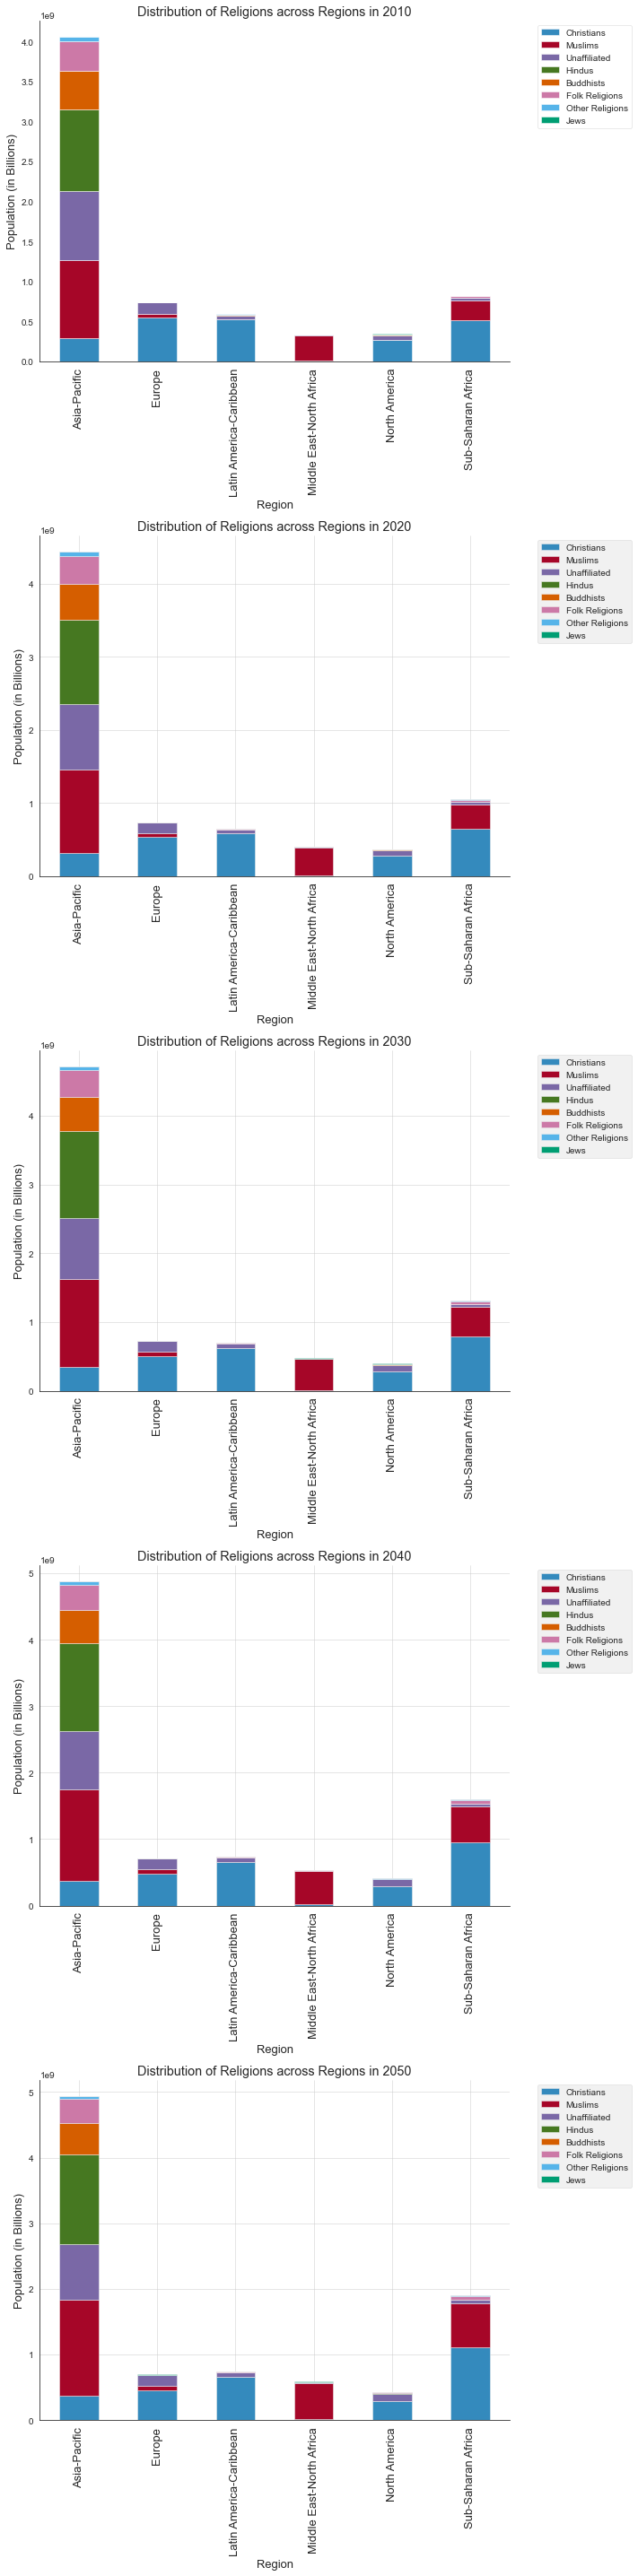

In [49]:
df_region = pop_regions_all_countries.drop('All Religions', axis = 1)
all_years = df_region['Year'].unique()

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 40))


for i, sel_year in enumerate(all_years):
    df_region1 = df_region[df_region['Year']==sel_year].drop(['Year','Country'], axis = 1)
    df_region1.groupby('Region').sum()
    
    axs[i].set_title(f"Distribution of Religions across Regions in {sel_year}")
    axs[i].set_xlabel("Region", fontsize = 13)
    axs[i].set_ylabel("Population (in Billions)",fontsize = 13)
    axs[i].tick_params(axis='x', rotation=75, labelsize = 13)
    
    df_region1.groupby('Region').sum().plot(kind="bar", stacked=True, ax=axs[i])
    
    axs[i].legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="medium")
    plt.style.use("bmh")
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


##### Exploring if the population counts of certain religious groups are correaled 


In [50]:
# taking data from one particular year
year = 2010
dfg[dfg['Year'] == year]
df_year = dfg[dfg['Year'] == year][['Christians', 'Muslims', 'Unaffiliated', 'Hindus', 'Buddhists', 'Folk Religions', 'Other Religions']]
corr_mat = df_year.corr()

<AxesSubplot: >

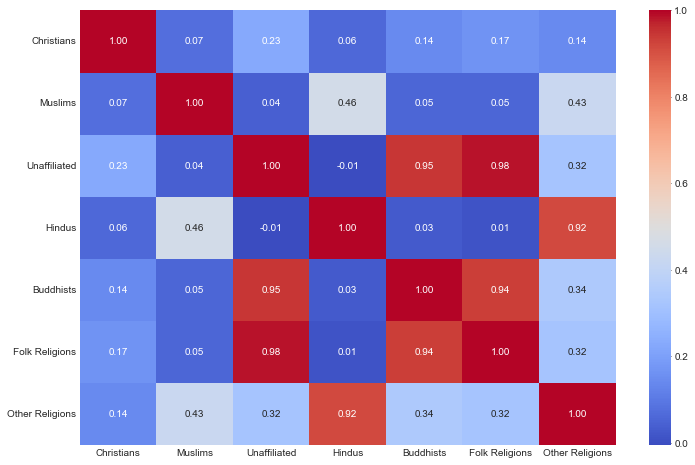

In [51]:
# plotting a heatmap using the above correlation matrix 
plt.figure(figsize = (12,8))
sns.heatmap(corr_mat, cmap="coolwarm", annot=True, fmt=".2f")

# Analysis: 
# 1. Buddhism is practised predominantly in regions where a large portion of the population also practise Folk Religions or 
# are unaffilaied with any religious group

# 2. Hinduism is practised in regions where 'other religions' are also practised and very few people identify as Unaffiliated

# 3. A noticeably small number of Muslims and Hindus live in regions predominantly inhabited by Christians

# 3. A smaller number of Muslims and Buddhists/ Athiests (unaffiliated) live together

##### Plotting change in global religious demographics from 2010 to 2050

In [52]:
world_copy = world.copy()

In [53]:
# calculating percentage of each religion 
rels = ["Christians", "Muslims", "Unaffiliated", "Hindus", "Buddhists", "Folk Religions", "Other Religions", "Jews"]
for rel in rels:
    world_copy[rel] = (world_copy[rel] /world["All Religions"])*100

world_copy1 = world_copy.drop('All Religions', axis = 1)

In [54]:
# Evolution of religious demographics - Percentages at the start of each decade

world_copy1

,Year,Region,Country,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews
0,2010,World,All Countries,31.443984,23.198010,16.403344,14.968568,7.073240,5.868602,0.843261,0.200990
241,2020,World,All Countries,31.117243,24.905679,15.589638,15.167689,6.620976,5.610833,0.796492,0.191451
482,2030,World,All Countries,30.984198,26.544410,14.814753,15.226507,6.143277,5.352569,0.750818,0.183349
723,2040,World,All Countries,31.057216,28.143929,14.018726,15.128448,5.678069,5.091829,0.704773,0.176897
964,2050,World,All Countries,31.352857,29.670395,13.219242,14.874092,5.224670,4.825732,0.660242,0.172877


<Figure size 432x288 with 0 Axes>

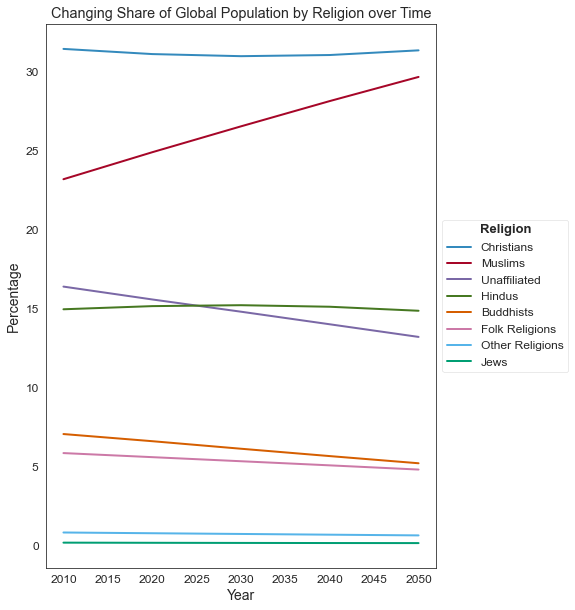

In [55]:
# Plotting the above table
plt.clf()
sns.set_style("white")
plt.figure(figsize=(7,10))


for rel in rels:
    plt.plot(world_copy1['Year'], world_copy1[rel], label=rel)


plt.xlabel('Year', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.title('Changing Share of Global Population by Religion over Time')
lgnd = plt.legend(title="Religion", loc="center left", bbox_to_anchor=(1, 0.5), fontsize = 12)
lgnd.get_title().set_fontweight('bold')
lgnd.get_title().set_fontsize(13)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()


### Final Visualization in Dash

In [ ]:

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.LUX])


markdown_text = '''
###### A Five Decade Long Global Religous Landscape 
Click on any country on the map to gain insight into its religious demographics.
Alternatively, select a country or region from the dropdown menus.
Select any year from the year slider, or religious group to view its population distribution.
_Please set the Region and Country to **'World'** when interacting with the global view of the map. 
Set Region to **'World'** while selecting countries from the Country dropdown and vice versa_

'''


df = dfg
world_top_four = world[['Year','Christians', 'Muslims','Hindus','Unaffiliated']]

region = pop[pop['Country']==' All Countries'].drop(['Country'], axis = 1)

#display(region)
color_keys = ['Christians', 'Muslims','Hindus','Unaffiliated','Jews','Buddhists','Folk Religions','Other Religions']

color_values = ['#7E54D4', '#0A6D08','#F1901E','#222222','blue', 'yellow','magenta','#FFDAB9'] 
colors = dict(zip(color_keys,color_values))



app.layout = dbc.Container([

    dbc.Row([
        dbc.Col(html.H1("World Religions Dashboard",
                        className='text-center text-primary mb-4', style={'font-family': 'Serif'}),
                width=12),
   
        
    ]
    ),
    
    dbc.Row([
        dbc.Col([
            dcc.Markdown(markdown_text, style={'font-size': '13px', 'font-family': 'Sans-serif', 'color':'black'})],width=12),]),
    
    
    dbc.Row([
        # dropdown 1 - religion
        
        dbc.Col([
            
            dbc.Form([
            

                dbc.Label("Select Religious Group:", style={'fontSize': 11, 'color':'black'}),
                
                dcc.Dropdown( id = 'dropdown',
                options = [
                
                {'label': 'Christians', 'value':'Christians'},
                {'label':'Muslims', 'value':'Muslims'},
                {'label': 'Hindus', 'value':'Hindus'},
                {'label': 'Jews', 'value':'Jews'},
                {'label': 'Buddhists', 'value':'Buddhists'},
                {'label': 'Unafilliated', 'value':'Unaffiliated'},
                {'label': 'Folk Religions', 'value':'Folk Religions'},
                {'label': 'Other Religions', 'value':'Other Religions'}
                ], value = 'Christians'),])], width={'size':2, 'offset':1, 'order':2}, align = 'start'
        
      ),
        
        dbc.Col([
            # dropdown 2  - Country
            
            dbc.Form([
            

                dbc.Label("Select Country:", style={'fontSize': 11, 'color':'black'}),
                
                dcc.Dropdown( id = 'dropdown2',
                options = [
                {'label':'World', 'value':'World' },
                {'label':'Afghanistan', 'value':'Afghanistan' },
                {'label':'Albania', 'value':'Albania' },
                {'label':'Algeria', 'value':'Algeria' },
                {'label':'American Samoa', 'value':'American Samoa' },
                {'label':'Andorra', 'value':'Andorra' },
                {'label':'Angola', 'value':'Angola' },
                {'label':'Anguilla', 'value':'Anguilla' },
                {'label':'Antigua and Barbuda', 'value':'Antigua and Barbuda' },
                {'label':'Argentina', 'value':'Argentina' },
                {'label':'Armenia', 'value':'Armenia' },
                {'label':'Aruba', 'value':'Aruba' },
                {'label':'Australia', 'value':'Australia' },
                {'label':'Austria', 'value':'Austria' },
                {'label':'Azerbaijan', 'value':'Azerbaijan' },
                {'label':'Bahamas', 'value':'Bahamas' },
                {'label':'Bahrain', 'value':'Bahrain' },
                {'label':'Bangladesh', 'value':'Bangladesh' },
                {'label':'Barbados', 'value':'Barbados' },
                {'label':'Belarus', 'value':'Belarus' },
                {'label':'Belgium', 'value':'Belgium' },
                {'label':'Belize', 'value':'Belize' },
                {'label':'Benin', 'value':'Benin' },
                {'label':'Bermuda', 'value':'Bermuda' },
                {'label':'Bhutan', 'value':'Bhutan' },
                {'label':'Bolivia', 'value':'Bolivia' },
                {'label':'Bosnia-Herzegovina', 'value':'Bosnia-Herzegovina' },
                {'label':'Botswana', 'value':'Botswana' },
                {'label':'Brazil', 'value':'Brazil' },
                {'label':'British Virgin Islands', 'value':'British Virgin Islands' },
                {'label':'Brunei', 'value':'Brunei' },
                {'label':'Bulgaria', 'value':'Bulgaria' },
                {'label':'Burkina Faso', 'value':'Burkina Faso' },
                {'label':'Burundi', 'value':'Burundi' },
                {'label':'Cambodia', 'value':'Cambodia' },
                {'label':'Cameroon', 'value':'Cameroon' },
                {'label':'Canada', 'value':'Canada' },
                {'label':'Cape Verde', 'value':'Cape Verde' },
                {'label':'Cayman Islands', 'value':'Cayman Islands' },
                {'label':'Central African Republic', 'value':'Central African Republic' },
                {'label':'Chad', 'value':'Chad' },
                {'label':'Channel Islands', 'value':'Channel Islands' },
                {'label':'Chile', 'value':'Chile' },
                {'label':'China', 'value':'China' },
                {'label':'Colombia', 'value':'Colombia' },
                {'label':'Comoros', 'value':'Comoros' },
                {'label':'Republic of the Congo', 'value':'Republic of the Congo' },
                {'label':'Democratic Republic of the Congo', 'value':'Democratic Republic of the Congo' },
                {'label':'Cook Islands', 'value':'Cook Islands' },
                {'label':'Costa Rica', 'value':'Costa Rica' },
                {'label': 'Ivory Coast', 'value': 'Ivory Coast'},
                {'label': 'Croatia', 'value': 'Croatia'},
                {'label': 'Cuba', 'value': 'Cuba'},
                {'label': 'Cyprus', 'value': 'Cyprus'},
                {'label': 'Czech Republic', 'value': 'Czech Republic'},
                {'label': 'Denmark', 'value': 'Denmark'},
                {'label': 'Djibouti', 'value': 'Djibouti'},
                {'label': 'Dominica', 'value': 'Dominica'},
                {'label': 'Dominican Republic', 'value': 'Dominican Republic'},
                {'label': 'Ecuador', 'value': 'Ecuador'},
                {'label': 'Egypt', 'value': 'Egypt'},
                {'label': 'El Salvador', 'value': 'El Salvador'},
                {'label': 'Equatorial Guinea', 'value': 'Equatorial Guinea'},
                {'label': 'Eritrea', 'value': 'Eritrea'},
                {'label': 'Estonia', 'value': 'Estonia'},
                {'label': 'Ethiopia', 'value': 'Ethiopia'},
                {'label': 'Faeroe Islands', 'value': 'Faeroe Islands'},
                {'label': 'Falkland Islands (Malvinas)', 'value': 'Falkland Islands (Malvinas)'},
                {'label': 'Fiji', 'value': 'Fiji'},
                {'label': 'Finland', 'value': 'Finland'},
                {'label': 'France', 'value': 'France'},
                {'label': 'French Guiana', 'value': 'French Guiana'},
                {'label': 'French Polynesia', 'value': 'French Polynesia'},
                {'label': 'Gabon', 'value': 'Gabon'},
                {'label': 'Gambia', 'value': 'Gambia'},
                {'label': 'Georgia', 'value': 'Georgia'},
                {'label': 'Germany', 'value': 'Germany'},
                {'label': 'Ghana', 'value': 'Ghana'},
                {'label': 'Gibraltar', 'value': 'Gibraltar'},
                {'label': 'Greece', 'value': 'Greece'},
                {'label': 'Greenland', 'value': 'Greenland'},
                {'label': 'Grenada', 'value': 'Grenada'},
                {'label': 'Guadeloupe', 'value': 'Guadeloupe'},
                {'label': 'Guam', 'value': 'Guam'},
                {'label': 'Guatemala', 'value': 'Guatemala'},
                {'label': 'Guinea', 'value': 'Guinea'},
                {'label': 'Guinea-Bissau', 'value': 'Guinea-Bissau'},
                {'label': 'Guyana', 'value': 'Guyana'},
                {'label': 'Haiti', 'value': 'Haiti'},
                {'label': 'Vatican City', 'value': 'Vatican City'},
                {'label': 'Honduras', 'value': 'Honduras'},
                {'label': 'Hong Kong', 'value': 'Hong Kong'},
                {'label': 'Hungary', 'value': 'Hungary'},
                {'label': 'Iceland', 'value': 'Iceland'},
                {'label': 'India', 'value': 'India'},
                {'label': 'Indonesia', 'value': 'Indonesia'},
                {'label': 'Iran', 'value': 'Iran'},
                {'label': 'Iraq', 'value': 'Iraq'},
                {'label': 'Ireland', 'value': 'Ireland'},
                {'label': 'Isle of Man', 'value': 'Isle of Man'},
                {'label': 'Israel', 'value': 'Israel'},
                {'label': 'Italy', 'value': 'Italy'},
                {'label': 'Jamaica', 'value': 'Jamaica'},
                {'label': 'Japan', 'value': 'Japan'},
                {'label': 'Jordan', 'value': 'Jordan'},
                {'label': 'Kazakhstan', 'value': 'Kazakhstan'},
                {'label': 'Kenya', 'value': 'Kenya'},
                {'label': 'Kiribati', 'value': 'Kiribati'},
                {'label': 'Kosovo', 'value': 'Kosovo'},
                {'label': 'Kuwait', 'value': 'Kuwait'},
                {'label': 'Kyrgyzstan', 'value': 'Kyrgyzstan'},
                {'label': 'Laos', 'value': 'Laos'},
                {'label': 'Latvia', 'value': 'Latvia'},
                {'label': 'Lebanon', 'value': 'Lebanon'},
                {'label': 'Lesotho', 'value': 'Lesotho'},
                {'label': 'Liberia', 'value': 'Liberia'},
                {'label': 'Libya', 'value': 'Libya'},
                {'label': 'Liechtenstein', 'value': 'Liechtenstein'},
                {'label': 'Lithuania', 'value': 'Lithuania'},
                {'label': 'Luxembourg', 'value': 'Luxembourg'},
                {'label': 'Macau', 'value': 'Macau'},
                {'label': 'Republic of Macedonia', 'value': 'Republic of Macedonia'},
                {'label': 'Madagascar', 'value': 'Madagascar'},
                {'label': 'Malawi', 'value': 'Malawi'},
                {'label': 'Malaysia', 'value': 'Malaysia'},
                {'label': 'Maldives', 'value': 'Maldives'},
                {'label': 'Mali', 'value': 'Mali'},
                {'label': 'Malta', 'value': 'Malta'},
                {'label': 'Marshall Islands', 'value': 'Marshall Islands'},
                {'label': 'Martinique', 'value': 'Martinique'},
                {'label': 'Mauritania', 'value': 'Mauritania'},
                {'label': 'Mauritius', 'value': 'Mauritius'},
                {'label': 'Mayotte', 'value': 'Mayotte'},
                {'label': 'Mexico', 'value': 'Mexico'},
                {'label': 'Federated States of Micronesia', 'value': 'Federated States of Micronesia'},
                {'label': 'Moldova', 'value': 'Moldova'},
                {'label': 'Monaco', 'value': 'Monaco'},
                {'label': 'Mongolia', 'value': 'Mongolia'},
                {'label': 'Montenegro', 'value': 'Montenegro'},
                {'label': 'Montserrat', 'value': 'Montserrat'},
                {'label': 'Morocco', 'value': 'Morocco'},
                {'label': 'Mozambique', 'value': 'Mozambique'},
                {'label': 'Burma (Myanmar)', 'value': 'Burma (Myanmar)'},
                {'label': 'Namibia', 'value': 'Namibia'},
                {'label': 'Nauru', 'value': 'Nauru'},
                {'label': 'Nepal', 'value': 'Nepal'},
                {'label': 'Netherlands', 'value': 'Netherlands'},
                {'label': 'New Caledonia', 'value': 'New Caledonia'},
                {'label': 'New Zealand', 'value': 'New Zealand'},
                {'label': 'Nicaragua', 'value': 'Nicaragua'},
                {'label': 'Niger', 'value': 'Niger'},
                {'label': 'Nigeria', 'value': 'Nigeria'},
                {'label': 'Niue', 'value': 'Niue'},
                {'label': 'North Korea', 'value': 'North Korea'},
                {'label': 'Northern Mariana Islands', 'value': 'Northern Mariana Islands'},
                {'label': 'Norway', 'value': 'Norway'},
                {'label': 'Oman', 'value': 'Oman'},
                {'label': 'Pakistan', 'value': 'Pakistan'},
                {'label': 'Palau', 'value': 'Palau'},
                {'label': 'Palestinian territories', 'value': 'Palestinian territories'},
                {'label': 'Panama', 'value': 'Panama'},
                {'label': 'Papua New Guinea', 'value': 'Papua New Guinea'},
                {'label': 'Paraguay', 'value': 'Paraguay'},
                {'label': 'Peru', 'value': 'Peru'},
                {'label': 'Philippines', 'value': 'Philippines'},
                {'label': 'Poland', 'value': 'Poland'},
                {'label': 'Portugal', 'value': 'Portugal'},
                {'label': 'Puerto Rico', 'value': 'Puerto Rico'},
                {'label': 'Qatar', 'value': 'Qatar'},
                {'label': 'Reunion', 'value': 'Reunion'},
                {'label': 'Romania', 'value': 'Romania'},
                {'label': 'Russia', 'value': 'Russia'},
                {'label': 'Rwanda', 'value': 'Rwanda'},
                {'label': 'St. Helena', 'value': 'St. Helena'},
                {'label': 'St. Kitts and Nevis', 'value': 'St. Kitts and Nevis'},
                {'label': 'St. Lucia', 'value': 'St. Lucia'},
                {'label': 'St. Pierre and Miquelon', 'value': 'St. Pierre and Miquelon'},
                {'label': 'St. Vincent and the Grenadines', 'value': 'St. Vincent and the Grenadines'},
                 {'label': 'Samoa', 'value': 'Samoa'},
                 {'label': 'San Marino', 'value': 'San Marino'},
                 {'label': 'Sao Tome and Principe', 'value': 'Sao Tome and Principe'},
                 {'label': 'Saudi Arabia', 'value': 'Saudi Arabia'},
                 {'label': 'Senegal', 'value': 'Senegal'},
                 {'label': 'Serbia', 'value': 'Serbia'},
                 {'label': 'Seychelles', 'value': 'Seychelles'},
                 {'label': 'Sierra Leone', 'value': 'Sierra Leone'},
                 {'label': 'Singapore', 'value': 'Singapore'},
                 {'label': 'Slovakia', 'value': 'Slovakia'},
                 {'label': 'Slovenia', 'value': 'Slovenia'},
                 {'label': 'Solomon Islands', 'value': 'Solomon Islands'},
                 {'label': 'Somalia', 'value': 'Somalia'},
                 {'label': 'South Africa', 'value': 'South Africa'},
                 {'label': 'South Korea', 'value': 'South Korea'},
                 {'label': 'Spain', 'value': 'Spain'},
                 {'label': 'Sri Lanka', 'value': 'Sri Lanka'},
                 {'label': 'Sudan', 'value': 'Sudan'},
                 {'label': 'Suriname', 'value': 'Suriname'},
                 {'label': 'Swaziland', 'value': 'Swaziland'},
                 {'label': 'Sweden', 'value': 'Sweden'},
                 {'label': 'Switzerland', 'value': 'Switzerland'},
                 {'label': 'Syria', 'value': 'Syria'},
                 {'label': 'Taiwan', 'value': 'Taiwan'},
                 {'label': 'Tajikistan', 'value': 'Tajikistan'},
                 {'label': 'Tanzania', 'value': 'Tanzania'},
                 {'label': 'Thailand', 'value': 'Thailand'},
                 {'label': 'Timor-Leste', 'value': 'Timor-Leste'},
                 {'label': 'Togo', 'value': 'Togo'},
                 {'label': 'Tokelau', 'value': 'Tokelau'},
                 {'label': 'Tonga', 'value': 'Tonga'},
                 {'label': 'Trinidad and Tobago', 'value': 'Trinidad and Tobago'},
                 {'label': 'Tunisia', 'value': 'Tunisia'},
                 {'label': 'Turkey', 'value': 'Turkey'},
                 {'label': 'Turkmenistan', 'value': 'Turkmenistan'},
                 {'label': 'Turks and Caicos Islands', 'value': 'Turks and Caicos Islands'},
                 {'label': 'Tuvalu', 'value': 'Tuvalu'},
                 {'label': 'Uganda', 'value': 'Uganda'},
                 {'label': 'Ukraine', 'value': 'Ukraine'},
                 {'label': 'United Arab Emirates', 'value': 'United Arab Emirates'},
                 {'label': 'United Kingdom', 'value': 'United Kingdom'},
                 {'label': 'United States', 'value': 'United States'},
                 {'label': 'U.S. Virgin Islands', 'value': 'U.S. Virgin Islands'},
                 {'label': 'Uruguay', 'value': 'Uruguay'},
                 {'label': 'Uzbekistan', 'value': 'Uzbekistan'},
                 {'label': 'Vanuatu', 'value': 'Vanuatu'},
                 {'label':'Venezuela', 'value':'Venezuela' },    
                    {'label':'Vietnam', 'value':'Vietnam' },
                    {'label':'Wallis and Futuna', 'value':'Wallis and Futuna' },
                    {'label':'Western Sahara', 'value':'Western Sahara' },
                    {'label':'Yemen', 'value':'Yemen' },
                    {'label':'Zambia', 'value':'Zambia' },
                    {'label':'Zimbabwe', 'value':'Zimbabwe' },
                    {'label':'South Sudan', 'value':'South Sudan' },
                    {'label':'Curacao', 'value':'Curacao' },
                    {'label':'Sint Maarten', 'value':'Sint Maarten' },
                    {'label':'Caribbean Netherlands', 'value':'Caribbean Netherlands' }], value = 'World'),])],
                    
                    width={'size':2, 'offset':0, 'order':2}, align = 'start'),
     
        
        
        
         # dropdown3 - Region
        
        dbc.Col([
            dbc.Form([

                dbc.Label("Select Region:", style={'fontSize': 11, 'color':'black'}),
                
            
            dcc.Dropdown( id = 'dropdown3',
                options = [
                    
                {"label":x,"value":x} for x in region['Region'].unique()]
                ,value = ' World'),])]
                         , width={'size':2, 'offset':0, 'order':2}, align = 'start'),
        
        # Year Slider
        
        dbc.Col([
            
            dcc.Slider(id='year_slider',
                min=2010,
                max=2050,
                value=2010,
                marks={'2010':'2010','2020':'2020','2030':'2030','2040':'2040','2050':'2050'},
                step=None)
            
            ], width={'size':4, 'offset':0, 'order':3}
        )
    ], align="end"),
    
   

    dbc.Row([
        
       # choropleth map

        dbc.Col([
            
            dcc.Graph(id = 'cp_geo'),
           
            
            
            ], width={'size':4, 'offset':0, 'order':1}
        
        ),
        
        # Polar Bar cart   
        dbc.Col([
            
            dcc.Graph(id = 'plbar'),
            
            
        ], width={'size':4, 'offset':0, 'order':2}, align = 'end' 
           
        ),
        # Bar Chart
        
        dbc.Col([
            
            
            dcc.Graph(id='bar'),
        ], width={'size':4, 'offset':0, 'order':3}, align = 'end'


    )], justify='start', className="g-0"), 
    

        


], fluid=True)




# Callback section: connecting the components
# ************************************************************************



# Geo Scatter Plot


@app.callback(Output(component_id='cp_geo', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value'),
              Input(component_id='year_slider', component_property= 'value'),
              Input(component_id='dropdown2', component_property= 'value')
              ])

def graph_update(dropdown_value, year_slider_value, dropdown2_value):
    #print(dropdown_value)
    selected_year = year_slider_value
    selected_country = dropdown2_value
    
    dff = df[df['Year']==year_slider_value]
    
    yel_custom = [
                    [0, 'rgb(255, 255, 255)'], 
                    [0.5, 'rgb(250, 250, 51)'],
                    [1, 'rgb(255, 215, 0)']
                    ]
    or_custom = [
                    [0, 'rgb(255, 255, 255)'], 
                    [0.5, 'rgb(240, 128, 0)'],
                    [1, 'rgb(255, 95, 21)']
                    ]

    
    color_scale = 'Greens'
    
    if dropdown_value == 'Muslims':
        color_scale = 'Greens'
    elif dropdown_value == 'Hindus':
        color_scale = or_custom
    elif dropdown_value == 'Unaffiliated':
        color_scale = 'turbid'
    elif dropdown_value == 'Folk Religions':
        color_scale = 'Pinkyl'
    elif dropdown_value == 'Buddhists':
        color_scale = yel_custom
    elif dropdown_value == 'Jews':
        color_scale = 'Blues'
    elif dropdown_value == 'Other Religions':
        color_scale = 'Peach'
    elif dropdown_value == 'Christians' or dropdown_value is None:
        color_scale = 'Purples'

    #display(dff)
    
    if dropdown_value is None or dropdown2_value is None:
        
        color_default = 'Christians'
        
        fig = px.choropleth(dff, locations='Country',
                            locationmode = 'country names',
                            color=color_default, 
                            hover_name='Country', 
                            projection='orthographic',
                            custom_data = ['Year'],
                            color_continuous_scale=color_scale)
        
        fig.update_layout(title = dict(text = f'<b>Global Population Distribution of {dropdown_value}<br> by numbers in {selected_year}</b>', 
                                       x = 0.4, y = 0.05, font=dict(size=12, family = 'Open Sans', color = 'black')),
                          
                          xaxis_title = '',
                          legend_title='',
                          legend=dict(
                                yanchor="top",
                                y=-0.10,
                                xanchor="left",
                                x=0.10,
                                font=dict(
                                    family="Open Sans",
                                    size=10,
                                    color="black"
                                        ),
                                orientation = 'h',
                                bgcolor="rgba(0,0,0,0)",
                              
                                  ),
                          margin=dict(l=0, r=0, t=50, b=50))
        
        return fig
        
    else:  

   
        fig = px.choropleth(dff, locations='Country',
                            locationmode = 'country names',
                            color=f"{dropdown_value}", 
                            hover_name="Country",
                            projection="orthographic",
                            custom_data = ['Year'], hover_data = {'Country': True},
                            color_continuous_scale=color_scale)
                                                    
                                                        
     
        fig.update_layout(title = dict(text = f'<b>Global Population Distribution of {dropdown_value}<br> by numbers in {selected_year}</b>', 
                                       x = 0.4, y = 0.05, font=dict(size=12, family = 'Open Sans', color = 'black')),
                          
                          xaxis_title = '',
                          legend_title='',
                          legend=dict(
                                yanchor="top",
                                y=-0.10,
                                xanchor="left",
                                x=0.10,
                                font=dict(
                                    family="Open Sans",
                                    size=10,
                                    color="black"
                                        ),
                                orientation = 'h',
                                bgcolor="rgba(0,0,0,0)",
                                  ),
                          margin=dict(l=0, r=0, t=50, b=50))
    
        if dropdown2_value == 'World':
    
        
        
            return fig  
    
        else:
            
            filtered_df = dff[dff['Country'] == dropdown2_value]
            #print(filtered_df)
            #print(filtered_df[f'{dropdown_value}'].iloc[0])
            
            def human_format(num):
                
                magnitude = 0
                while abs(num) >= 1000:
                    magnitude += 1
                    num /= 1000.0
                return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

            print(human_format(filtered_df[f'{dropdown_value}'].iloc[0]))
            

            # get the latitude and longitude for the selected country
            latitude = filtered_df['Latitude (average)'].iloc[0]   
            longitude = filtered_df['Longitude (average)'].iloc[0]
            
          
            #print(latitude)
            #print(longitude)
            
            
            fig.update_layout(title = dict(text = f'<b>{dropdown_value} in {selected_country} in {selected_year}</b>', 
                                       x = 0.4, y = 0.1, font=dict(size=12, family = 'Open Sans', color = 'black')),
                        
                          margin=dict(l=0, r=0, t=50, b=50))
        

            trace = go.Scattergeo(
                        locationmode='ISO-3',
                        locations=dff[dff['Country']==dropdown2_value]['iso_alpha'],
                        text=f'<b>{dropdown2_value}</b> <br>{dropdown_value}:'
                            +human_format(filtered_df[f'{dropdown_value}'].iloc[0]),
                        mode='markers+text',
                        marker=dict(size=5, color = 'white', opacity = 0.5),
                        textfont=dict(size=10, color='white'),
                        textposition = "middle center",
                        showlegend=False,
                        hoverinfo = 'all',
                    )


            fig.update_layout(
                title_yanchor = 'bottom',
                geo=dict(
                    projection_type="natural earth",
                    center=dict(lon=float(longitude), lat=float(latitude)),
                    projection_scale= 12
                ),
                    hovermode='closest',
                     annotations=[
                             go.layout.Annotation(
                             
                             text = f'<b>{dropdown2_value} <br>{dropdown_value}:</b>'
                                 + f'<b>{human_format(filtered_df[dropdown_value].iloc[0])}</b>',
                                 
                             align = 'center',
                             
                             font=dict(size=10, color="rgba(0, 0, 0, 1)"),
                             bgcolor="white",
                             opacity=0.90,
                                                 )]
                    
            )
            
 
            return fig
    




# Polar Bar chart 

@app.callback(Output(component_id ='plbar', component_property = 'figure'),
            [Input(component_id = 'dropdown', component_property = 'value'),
             Input(component_id='dropdown2', component_property= 'value'),
             Input(component_id='dropdown3', component_property= 'value'),
             Input(component_id = "cp_geo", component_property= "hoverData"),
             Input(component_id = "cp_geo", component_property= "clickData"),
             Input(component_id = "cp_geo", component_property= "selectedData"),
             Input(component_id='year_slider', component_property= 'value')
            ])

def plbar_graph_update(dropdown_value, dropdown2_value, dropdown3_value, hov_data, clk_data, slct_data, year_slider_value):

    colors = ['#7E54D4', '#0A6D08','#F1901E','#222222','#FFDF00','#FC46AA','#F5DEB3','#002885']

    labels = ['Christians','Muslims','Hindus','Unaffiliated','Buddhists','Folk Religions','Other Religions','Jews']
    
    def human_format(num):
        magnitude = 0
        while abs(num) >= 1000:
            magnitude += 1
            num /= 1000.0
        return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])
    
    selected_year = year_slider_value
    #print(f'click data:{clk_data}')
    
    
    if dropdown2_value is None or dropdown3_value is None:
        
        world1 = world.drop(['Year','Region','Country','All Religions'], axis = 1)
        world2 = world1.transpose()
        world2.reset_index(inplace = True)
        world2.columns = ['Religion',2010,2020,2030,2040,2050]
        world2
        world3= world2[['Religion',selected_year]]
        world3 = world3.reindex([0,1,3,2,4,5,6,7])
        #display(world3)
        #print(world3)
        
        values = world3[selected_year]
        #print(values)
        total = np.sum(world3[selected_year])
        percentages = [f"{val/total:.2%}" for val in world3[selected_year]]
       


        fig4 = px.bar_polar(world3, r=selected_year, theta="Religion",
                           color="Religion",
                           color_discrete_sequence= colors,
                           custom_data=[percentages])
        
        # update trace for the selected label
        fig4.update_traces(
                marker_line_width=4,
                marker_line_color='black',
                selector=dict(name=dropdown_value)
            )

        # update traces for the rest of the labels
        fig4.update_traces(
            marker_line_width=2,
            marker_line_color='grey',
            selector=dict(name=[x for x in labels if x != dropdown_value])
        )

        fig4.update_layout(


            polar=dict(
                bgcolor='white',
                radialaxis=dict(showticklabels=True, ticks='', showline=True, showgrid=True, gridcolor = 'grey',
                                 tickfont=dict(size=15, color = 'black')),
                angularaxis=dict(showticklabels=True, ticks='', linewidth=1, linecolor='grey', 
                                 tickfont=dict(size=15, color = 'black'))
            ),
            ),


        fig4.update_layout(
            title = dict(text = f'<b>Worldwide Composition of <br>Religions in{selected_year}</b>',
                         y =0.1, x=0.2, font_size = 12),


            font=dict(
                family="Open Sans",
                size=11,
                color="black"
                ))



        fig4.update_layout(

             legend=dict(
                 y=-1.1, # move the legend to the bottom
                xanchor="center"),
            legend_title="",
             font=dict(
                 family="Open Sans",
                 size=11,
                 color="black"
                 ))
        
        fig4.update_traces(hovertemplate="<br>%{customdata[0]}")
        


        return fig4

    
    if clk_data is None and dropdown3_value == ' World' and dropdown2_value == 'World':
        
        

        world1 = world.drop(['Year','Region','Country','All Religions'], axis = 1)
        world2 = world1.transpose()
        world2.reset_index(inplace = True)
        world2.columns = ['Religion',2010,2020,2030,2040,2050]
        world2
        world3= world2[['Religion',selected_year]]
        world3 = world3.reindex([0,1,3,2,4,5,6,7])
        #display(world3)
 
        values = world3[selected_year]
        #print(values)
        
        total = np.sum(world3[selected_year])
        percentages = [f"{val/total:.2%}" for val in world3[selected_year]]

        fig4 = px.bar_polar(world3, r=selected_year, theta="Religion",
                           color="Religion",
                           color_discrete_sequence= colors,
                           custom_data=[percentages])
        
        # update trace for the selected label (bold highlight)
        fig4.update_traces(
                marker_line_width=4,
                marker_line_color='black',
                selector=dict(name=dropdown_value)
            )

        # update traces for the rest of the labels
        fig4.update_traces(
            marker_line_width=2,
            marker_line_color='grey',
            selector=dict(name=[x for x in labels if x != dropdown_value])
        )

        fig4.update_layout(


            polar=dict(
                bgcolor='white',
                radialaxis=dict(showticklabels=True, ticks='', showline=True, showgrid=True, gridcolor = 'grey',
                                 tickfont=dict(size=15, color = 'black')),
                angularaxis=dict(showticklabels=True, ticks='', linewidth=1, linecolor='grey', 
                                 tickfont=dict(size=15, color = 'black'))
            ),
            ),


        fig4.update_layout(
            title = dict(text = f'<b>Worldwide Composition of <br>Religions in {selected_year}</b>',
                         y =0.1, x=0.2, font_size = 12),


            font=dict(
                family="Open Sans",
                size=11,
                color="black"
                ))



        fig4.update_layout(

             legend=dict(
                 y=-1.1, 
                xanchor="center"),
            legend_title="",
             font=dict(
                 family="Open Sans",
                 size=12,
                 color="black"
                 ))
        
        fig4.update_traces(hovertemplate="<br>%{customdata[0]}")
        
        fig4.add_annotation(x=0.025, y=-0.8,
                   text=f"<b>Total population:{human_format(world[world['Year'] == selected_year]['All Religions'].values[0])}</b>",
                   showarrow=False,
                   font=dict(size=10.5, color = 'black'))

         
        
        return fig4
    
    
    elif dropdown2_value != 'World' and dropdown3_value ==' World' and clk_data is None:
        
        hov_country = dropdown2_value
        
        ndf1 = pop_codes[(pop_codes['Year'] == selected_year) & (pop_codes['Country']==f'{hov_country}')]
        #display(ndf1)

        ndf2 = ndf1.drop(['Year','Region','Country','All Religions','iso_alpha','country-code'], axis = 1)
        ndf3 = ndf2.transpose()
        ndf3.reset_index(inplace = True)
        ndf3.columns = ['Religion','Population']
        ndf3
        ndf3 = ndf3.reindex([0,1,3,2,4,5,6,7])
        #display(ndf3)
        
        values = ndf3.Population
        
        total = np.sum(ndf3['Population'])
        percentages = [f"{val/total:.2%}" for val in ndf3['Population']]
        
        
        fig4 = px.bar_polar(ndf3, r='Population', theta="Religion",
                           color="Religion",
                           color_discrete_sequence= colors,
                           custom_data=[percentages])
        
        # update trace for the selected label
        fig4.update_traces(
                marker_line_width=4,
                marker_line_color='black',
                selector=dict(name=dropdown_value)
            )

        # update traces for the rest of the labels
        fig4.update_traces(
            marker_line_width=2,
            marker_line_color='grey',
            selector=dict(name=[x for x in labels if x != dropdown_value])
        )

        fig4.update_layout(


            polar=dict(
                bgcolor='white',
                radialaxis=dict(showticklabels=True, ticks='', showline=True, showgrid=True, gridcolor = 'grey',
                                 tickfont=dict(size=14, color = 'black')),
                angularaxis=dict(showticklabels=True, ticks='', linewidth=1, linecolor='grey', 
                                 tickfont=dict(size=14, color = 'black'))
            ),
            )


        fig4.update_layout(

             legend=dict(
                 y=-1.1, 
                xanchor="center"),
            legend_title="",
             font=dict(
                 family="Open Sans",
                 size=11,
                 color="black"
                 ))
        
        fig4.update_layout(
            title = dict(text = f'<b>Composition of Religions in<br>{hov_country} in {selected_year}</b>',y =0.1, x=0.2, 
                         font_size = 12),


            font=dict(
                family="Open Sans",
                size=11,
                color="black"
                ))
        
        fig4.update_traces(hovertemplate="<br>%{customdata[0]}")
        
        fig4.add_annotation(x=0.025, y=-0.8,
                   text=f"<b>Total population:{human_format(ndf1['All Religions'].values[0])}</b>",
                   showarrow=False,
                   font=dict(size=10.5, color = 'black'))
        
        
        return fig4
    
    
    elif dropdown2_value != 'World' and dropdown3_value ==' World' and clk_data is not None:
        
        hov_country = dropdown2_value
        
        ndf1 = pop_codes[(pop_codes['Year'] == selected_year) & (pop_codes['Country']==f'{hov_country}')]
        #display(ndf1)

        ndf2 = ndf1.drop(['Year','Region','Country','All Religions','iso_alpha','country-code'], axis = 1)
        ndf3 = ndf2.transpose()
        ndf3.reset_index(inplace = True)
        ndf3.columns = ['Religion','Population']
        ndf3
        ndf3 = ndf3.reindex([0,1,3,2,4,5,6,7])
        #display(ndf3)
        
        values = ndf3.Population
        
        total = np.sum(ndf3['Population'])
        percentages = [f"{val/total:.2%}" for val in ndf3['Population']]
        
        fig4 = px.bar_polar(ndf3, r='Population', theta="Religion",
                           color="Religion",
                           color_discrete_sequence= colors,
                           custom_data=[percentages])
        
        
  
        # update trace for the selected label
        fig4.update_traces(
            marker_line_width=4,
            marker_line_color='black',
            selector=dict(name=dropdown_value))


        # update traces for the rest of the labels
        fig4.update_traces(
            marker_line_width=2,
            marker_line_color='grey',
            selector=dict(name=[x for x in labels if x != dropdown_value]))


        fig4.update_layout(


            polar=dict(
                bgcolor='white',
                radialaxis=dict(showticklabels=True, ticks='', showline=True, showgrid=True, gridcolor = 'grey',
                                 tickfont=dict(size=14, color = 'black')),
                angularaxis=dict(showticklabels=True, ticks='', linewidth=1, linecolor='grey', 
                                 tickfont=dict(size=14, color = 'black'))),
            )


        fig4.update_layout(

             legend=dict(
                 y=-1.1, 
                xanchor="center"),
            legend_title="",
             font=dict(
                 family="Open Sans",
                 size=11,
                 color="black"
                 ))
        
        fig4.update_layout(
            title = dict(text = f'<b>Composition of Religions in<br>{hov_country} in {selected_year}</b>',
                         y =0.1, x=0.2, font_size = 12),


            font=dict(
                family="Open Sans",
                size=11,
                color="black"
                ))
        
        fig4.update_traces(hovertemplate="<br>%{customdata[0]}")
        
        fig4.add_annotation(x=0.025, y=-0.8,
                   text=f"<b>Total population:{human_format(ndf1['All Religions'].values[0])}</b>",
                   showarrow=False,
                   font=dict(size=10.5, color = 'black'))

        
        return fig4
    
    
    elif dropdown2_value == 'World' and clk_data is not None and dropdown3_value == ' World':
        
        #print(f'{dropdown_value}\n')
        #print(f'hover data: {hov_data}')
        
        hov_country = clk_data['points'][0]['hovertext']
        
        ndf1 = pop_codes[(pop_codes['Year'] == selected_year) & (pop_codes['Country']==f'{hov_country}')]
        #display(ndf1)

        ndf2 = ndf1.drop(['Year','Region','Country','All Religions','iso_alpha','country-code'], axis = 1)
        ndf3 = ndf2.transpose()
        ndf3.reset_index(inplace = True)
        ndf3.columns = ['Religion','Population']
        ndf3 = ndf3.reindex([0,1,3,2,4,5,6,7])
        
        # display(ndf3)
        
        values = ndf3.Population
        
        total = np.sum(ndf3['Population'])
        percentages = [f"{val/total:.2%}" for val in ndf3['Population']]
        
        fig4 = px.bar_polar(ndf3, r='Population', theta="Religion",
                           color="Religion",
                           color_discrete_sequence= colors,
                           custom_data=[percentages])
        
        # update trace for the selected label
        fig4.update_traces(
            marker_line_width=4,
            marker_line_color='black',
            selector=dict(name=dropdown_value)
            )

        # update traces for the rest of the labels
        fig4.update_traces(
            marker_line_width=2,
            marker_line_color='grey',
            selector=dict(name=[x for x in labels if x != dropdown_value])
        )

        fig4.update_layout(


            polar=dict(
                bgcolor='white',
                radialaxis=dict(showticklabels=True, ticks='', showline=True, showgrid=True, gridcolor = 'grey',
                                 tickfont=dict(size=14, color = 'black')),
                angularaxis=dict(showticklabels=True, ticks='', linewidth=1, linecolor='grey', 
                                 tickfont=dict(size=14, color = 'black'))
            ),
            )


        fig4.update_layout(

             legend=dict(
                 y=-1.1, 
                xanchor="center"),   
             legend_title="",
             font=dict(
                 family="Open Sans",
                 size=11,
                 color="black"
                 ))
        
        fig4.update_layout(
            title = dict(text = f'<b>Composition of Religions in<br>{hov_country} in {selected_year}</b>',
                         y =0.1, x=0.2, font_size = 12),


            font=dict(
                family="Open Sans",
                size=11,
                color="black"
                ))
        
        fig4.update_traces(hovertemplate="<br>%{customdata[0]}")
        
        fig4.add_annotation(x=0.025, y=-0.8,
                   text=f"<b>Total population:{human_format(ndf1['All Religions'].values[0])}</b>",
                   showarrow=False,
                   font=dict(size=10.5, color = 'black'))
        

        
        
        return fig4
    
    
    
    elif dropdown3_value != ' World' and dropdown2_value == 'World' and clk_data is not None:
        
                
        selected_region = dropdown3_value
        
        #print(f'SEL REG : {selected_region}')
        reg = region.drop([0,241,482,723,964], axis = 0)
        #display(reg)
        reg1 = reg[(reg['Year'] == selected_year) & (reg['Region']==f'{selected_region}')]
        #display(reg1)
        reg2 = reg1.drop(['Year','Region', 'All Religions'], axis = 1)
        reg3 = reg2.transpose()
        #display(reg3)
        reg3.reset_index(inplace = True)
        reg3.columns = ['Religion','Population']
        reg3 = reg3.reindex([0,1,3,2,4,5,6,7])
        values = reg3.Population
        
        total = np.sum(reg3['Population'])
        percentages = [f"{val/total:.2%}" for val in reg3['Population']]
        
        fig4 = px.bar_polar(reg3, r='Population', theta="Religion",
                           color="Religion",
                           color_discrete_sequence= colors,
                           custom_data=[percentages])
        
        # update trace for the selected label
        fig4.update_traces(
            marker_line_width=4,
            marker_line_color='black',
            selector=dict(name=dropdown_value)
            )

        # update traces for the rest of the labels
        fig4.update_traces(
            marker_line_width=2,
            marker_line_color='grey',
            selector=dict(name=[x for x in labels if x != dropdown_value])
        )

        fig4.update_layout(


            polar=dict(
                bgcolor='white',
                radialaxis=dict(showticklabels=True, ticks='', showline=True, showgrid=True, gridcolor = 'grey',
                                 tickfont=dict(size=14, color = 'black')),
                angularaxis=dict(showticklabels=True, ticks='', linewidth=1, linecolor='grey', 
                                 tickfont=dict(size=14, color = 'black'))
            ),
            )


        fig4.update_layout(

             legend=dict(
                 y=-1.1, 
                xanchor="center"),  
             legend_title="",
             font=dict(
                 family="Open Sans",
                 size=11,
                 color="black"
                 ))
        
        
        fig4.update_layout(
            title = dict(text = f'<b>Composition of Religions in<br>{selected_region} in {selected_year}</b>',
                         y =0.1, x=0.2, font_size = 12),


            font=dict(
                family="Open Sans",
                size=11,
                color="black"
                ))
        

        fig4.update_traces(hovertemplate="<br>%{customdata[0]}")
        
        fig4.add_annotation(x=0.025, y=-0.8,
                   text=f"<b>Total population:{human_format(reg1['All Religions'].values[0])}</b>",
                   showarrow=False,
                   font=dict(size=10.5, color = 'black'))

        return fig4
    
    elif dropdown3_value != ' World' and dropdown2_value != 'World' and clk_data is None:
        
        hov_country = dropdown2_value
        
        ndf1 = pop_codes[(pop_codes['Year'] == selected_year) & (pop_codes['Country']==f'{hov_country}')]
        #display(ndf1)

        ndf2 = ndf1.drop(['Year','Region','Country','All Religions','iso_alpha','country-code'], axis = 1)
        ndf3 = ndf2.transpose()
        ndf3.reset_index(inplace = True)
        ndf3.columns = ['Religion','Population']
        ndf3
        ndf3 = ndf3.reindex([0,1,3,2,4,5,6,7])
        #display(ndf3)
        
        values = ndf3.Population
        
        total = np.sum(ndf3['Population'])
        percentages = [f"{val/total:.2%}" for val in ndf3['Population']]
        
        fig4 = px.bar_polar(ndf3, r='Population', theta="Religion",
                           color="Religion",
                           color_discrete_sequence= colors,
                           custom_data=[percentages])
        
        # update trace for the selected label
        fig4.update_traces(
            marker_line_width=4,
            marker_line_color='black',
            selector=dict(name=dropdown_value)
            )

        # update traces for the rest of the labels
        fig4.update_traces(
            marker_line_width=2,
            marker_line_color='grey',
            selector=dict(name=[x for x in labels if x != dropdown_value])
        )

        fig4.update_layout(


            polar=dict(
                bgcolor='white',
                radialaxis=dict(showticklabels=True, ticks='', showline=True, showgrid=True, gridcolor = 'grey',
                                 tickfont=dict(size=14, color = 'black')),
                angularaxis=dict(showticklabels=True, ticks='', linewidth=1, linecolor='grey', 
                                 tickfont=dict(size=14, color= 'black'))
            ),
            )


        fig4.update_layout(

             legend=dict(
                 y=-1.1, 
                 xanchor="center"), 
                 legend_title="",
                 font=dict(
                 family="Open Sans",
                 size=11,
                 color="black"
                 ))
        
        fig4.update_layout(
            title = dict(text = f'<b>Composition of Religions in<br>{hov_country} in {selected_year}</b>',
                         y =0.1, x=0.2, font_size = 12),


            font=dict(
                family="Open Sans",
                size=11,
                color="black"
                ))
        
        fig4.update_traces(hovertemplate="<br>%{customdata[0]}")
        
        fig4.add_annotation(x=0.025, y=-0.8,
                   text=f"<b>Total population:{human_format(ndf1['All Religions'].values[0])}</b>",
                   showarrow=False,
                   font=dict(size=10.5, color = 'black'))

        
        return fig4
    
    elif dropdown3_value != ' World' and dropdown2_value == 'World':
        
        selected_region = dropdown3_value
        
        #print(f'SEL REG : {selected_region}')
        reg = region.drop([0,241,482,723,964], axis = 0)
        #display(reg)
        reg1 = reg[(reg['Year'] == selected_year) & (reg['Region']==f'{selected_region}')]
        #display(reg1)
        reg2 = reg1.drop(['Year','Region', 'All Religions'], axis = 1)
        reg3 = reg2.transpose()
        #display(reg3)
        reg3.reset_index(inplace = True)
        reg3.columns = ['Religion','Population']
        reg3 = reg3.reindex([0,1,3,2,4,5,6,7])
        values = reg3.Population
        
        total = np.sum(reg3['Population'])
        percentages = [f"{val/total:.2%}" for val in reg3['Population']]
        
        fig4 = px.bar_polar(reg3, r='Population', theta="Religion",
                           color="Religion",
                           color_discrete_sequence= colors,
                           custom_data=[percentages])
        
        # update trace for the selected label
        fig4.update_traces(
            marker_line_width=4,
            marker_line_color='black',
            selector=dict(name=dropdown_value)
            )

        # update traces for the rest of the labels
        fig4.update_traces(
            marker_line_width=2,
            marker_line_color='grey',
            selector=dict(name=[x for x in labels if x != dropdown_value])
        )

        fig4.update_layout(


            polar=dict(
                bgcolor='white',
                radialaxis=dict(showticklabels=True, ticks='', showline=True, showgrid=True, gridcolor = 'grey',
                                 tickfont=dict(size=14, color = 'black')),
                angularaxis=dict(showticklabels=True, ticks='', linewidth=1, linecolor='grey', 
                                 tickfont=dict(size=14, color = 'black'))
            ),
            )
        
        fig4.update_layout(
                legend=dict(
                y=-1.1, 
                xanchor="center"),
                legend_title="",

                font=dict(
                    family="Open Sans",
                    size=11,
                    color="black"
                    )
                )
            
        
        fig4.update_layout(
            title = dict(text = f'<b>Composition of Religions in<br>{selected_region} in {selected_year}</b>',
                         y =0.1, x=0.2, font_size = 12),


            font=dict(
                family="Open Sans",
                size=11,
                color="black"
                ))
        
        fig4.update_traces(hovertemplate="<br>%{customdata[0]}")
        
        fig4.add_annotation(x=0.025, y=-0.8,
                   text=f"<b>Total population:{human_format(reg1['All Religions'].values[0])}</b>",
                   showarrow=False,
                   font=dict(size=10.5, color = 'black'))

        return fig4
    
  
        
    

# Bar Chart

@app.callback(
    Output(component_id = "bar", component_property= "figure"),
    [
        Input(component_id = "cp_geo", component_property= "clickData"),
        Input(component_id = "cp_geo", component_property= "hoverData"),
        Input(component_id = "cp_geo", component_property= "selectedData"),
        Input(component_id = "dropdown", component_property= "value"),
        Input(component_id='dropdown2', component_property= 'value'),
        Input(component_id='dropdown3', component_property= 'value'),
        Input(component_id='year_slider', component_property= 'value')
        
    ]
)


def update_bar_chart(clk_data, hov_data, slct_data, dropdown_value, dropdown2_value, dropdown3_value, year_slider_value):
    
    selected_year = year_slider_value
    selected_country = dropdown2_value
    selected_region = dropdown3_value
    
    if dropdown2_value is None or dropdown3_value is None:
        
        fig2 = px.bar(world_top_four, x='Year', y=['Christians', 'Muslims','Hindus','Unaffiliated'],barmode='group',
             color_discrete_map = colors)
        
        
        fig2["data"][0]["marker"]["color"] = ['#562BAB' if x == selected_year else '#7E54D4' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["color"] = ['#053904' if x == selected_year else '#0A6D08' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["color"] = ['#C9710D' if x == selected_year else '#F1901E' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["color"] = ['#000000' if x == selected_year else '#222222' for x in fig2["data"][0]["x"]]
        
        fig2["data"][0]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][0]["marker"]["line"]["color"] = ["black" if x == selected_year else '#7E54D4' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["color"] = ["black" if x == selected_year else '#0A6D08' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["color"] = ["black" if x == selected_year else '#F1901E' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["color"] = ["black" if x == selected_year else '#222222' for x in fig2["data"][0]["x"]]
        
        
        fig2.update_xaxes(tickprefix="<b>",ticksuffix ="</b><br>")
        
        
        fig2.update_layout(paper_bgcolor = "rgba(0,0,0,0)",plot_bgcolor = "rgba(0,0,0,0)",
                           xaxis_title = '<b>Year</b>',yaxis_title = '<b>Population</b>',
                           title = dict(text = f'<b>Worldwide Distribution of Top Four Global Religions over time</b>',
                                         x = 0.5, y = 0.95, font=dict(size=12, family = 'Open Sans', color = 'black')),
                           font_size = 11,
                           hovermode="x unified",
                           hoverlabel=dict(bgcolor='white', font=dict(color='black', size = 12)),
                           legend=dict(yanchor="top",
                                       y=-0.50,
                                       xanchor="right",
                                       x=0.10),
                           showlegend=False,
                           margin=dict(l=0, r=0, t=50, b=50)
                            )
                           

        
        fig2.update_traces(hovertemplate='<br> %{y}')
        
        return fig2
    
    if dropdown2_value == 'World' and dropdown3_value == ' World' and clk_data is None:
        
            
        fig2 = px.bar(world_top_four, x='Year', y=['Christians', 'Muslims','Hindus','Unaffiliated'],barmode='group',
             color_discrete_map = colors)
        
        
        fig2["data"][0]["marker"]["color"] = ['#562BAB' if x == selected_year else '#7E54D4' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["color"] = ['#053904' if x == selected_year else '#0A6D08' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["color"] = ['#C9710D' if x == selected_year else '#F1901E' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["color"] = ['#000000' if x == selected_year else '#222222' for x in fig2["data"][0]["x"]]
        
        fig2["data"][0]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][0]["marker"]["line"]["color"] = ["black" if x == selected_year else '#7E54D4' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["color"] = ["black" if x == selected_year else '#0A6D08' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["color"] = ["black" if x == selected_year else '#F1901E' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["color"] = ["black" if x == selected_year else '#222222' for x in fig2["data"][0]["x"]]
        
        
        fig2.update_xaxes(tickprefix="<b>",ticksuffix ="</b><br>")
        
        
        fig2.update_layout(paper_bgcolor = "rgba(0,0,0,0)",plot_bgcolor = "rgba(0,0,0,0)",
                           xaxis_title = '<b>Year</b>',yaxis_title = '<b>Population</b>',
                           title = dict(text = f'<b>Change in Top Four Global Religions Over Time Worldwide</b>',
                                         x = 0.5, y = 0.95, font=dict(size=12, family = 'Open Sans', color = 'black')),
                           font_size = 11,
                           hovermode="x unified",
                           hoverlabel=dict(bgcolor='white', font=dict(color='black', size = 12)),
                           legend=dict(yanchor="top",
                                       y=-0.50,
                                       xanchor="right",
                                       x=0.10),
                           showlegend=False,
                           margin=dict(l=0, r=0, t=50, b=50)
                            )
                           

        
        fig2.update_traces(hovertemplate='<br> %{y}')
        
        return fig2
    
    elif dropdown2_value != 'World' and dropdown3_value == ' World':
    
        hov_country = dropdown2_value

        dff2 = df[df['Country']==f'{hov_country}']
        dff3 = dff2[['Christians', 'Muslims', 'Unaffiliated', 'Hindus', 'Buddhists', 'Folk Religions', 'Other Religions', 'Jews']]
        dff4 = pd.DataFrame(dff3.iloc[0])
        dff4.columns = ['value']
        
        max_cols = dff4.nlargest(4, 'value').index.tolist()
        result = dff2.loc[:, ['Year'] + max_cols]
       
        fig2 = px.bar(result, x='Year', y=max_cols,barmode='group',
             color_discrete_map = colors)
        
        #print(fig2["data"][0]["marker"])
                
       
        fig2["data"][0]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][0]["marker"]["line"]["color"] = ["black" if x == selected_year else '#7E54D4' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["color"] = ["black" if x == selected_year else '#0A6D08' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["color"] = ["black" if x == selected_year else '#F1901E' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["color"] = ["black" if x == selected_year else '#222222' for x in fig2["data"][0]["x"]]
        
                
        fig2.update_xaxes(tickprefix="<b>",ticksuffix ="</b><br>")
        
        fig2.update_layout(title = dict(text = f'<b>Change in Top Four Religions<br> in {selected_country} Over Time</b>',
                         x = 0.5, y = 0.95, font=dict(size=12, family = 'Open Sans', color = 'black')),
                           
                        #title_yanchor = 'bottom',
                        xaxis_title = '<b>Year</b>',
                        yaxis_title = '<b>Population</b>',
                        paper_bgcolor = "rgba(0,0,0,0)",
                        plot_bgcolor = "rgba(0,0,0,0)",

                        font_size = 11,
                        hovermode="x unified",
                        hoverlabel=dict(bgcolor='white', font=dict(color='black', size = 12)),
                        legend=dict(
                                            yanchor="bottom",
                                            y=-0.50,
                                            xanchor="left",
                                            x=0.10
                                              ),
                        showlegend=False,
                        margin=dict(l=0, r=0, t=50, b=50))
        
        

        fig2.update_traces(hovertemplate='<br> %{y}')



        return fig2
    
    elif dropdown2_value == 'World' and dropdown3_value != ' World':
        
        selected_region = dropdown3_value
     
        reg = region.drop([0,241,482,723,964], axis = 0)
        
        reg1 = reg[(reg['Region']==selected_region)]
        
        dff3 = reg1[['Year','Christians', 'Muslims', 'Unaffiliated', 'Hindus', 'Buddhists', 'Folk Religions', 'Other Religions', 'Jews']]
        dff4 = pd.DataFrame(dff3.iloc[0])
        dff4.columns = ['value']
        
        max_cols = dff4.nlargest(4, 'value').index.tolist()
        result = dff3.loc[:, ['Year'] + max_cols]
               
        fig2 = px.bar(result, x='Year', y=max_cols,barmode='group',
             color_discrete_map = colors)
               
        fig2["data"][0]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][0]["marker"]["line"]["color"] = ["black" if x == selected_year else 'white' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["color"] = ["black" if x == selected_year else 'white' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["color"] = ["black" if x == selected_year else 'white' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["color"] = ["black" if x == selected_year else 'white' for x in fig2["data"][0]["x"]]
        
                
        fig2.update_xaxes(tickprefix="<b>",ticksuffix ="</b><br>")
        
        fig2.update_layout(title = dict(text = f'<b>Change in Top Four Religions<br> in {selected_region} Over Time</b>',
                         x = 0.5, y = 0.95, font=dict(size=12, family = 'Open Sans', color = 'black')),
                           xaxis_title = '<b>Year</b>',
                           yaxis_title = '<b>Population</b>',
                           paper_bgcolor = "rgba(0,0,0,0)",
                           plot_bgcolor = "rgba(0,0,0,0)",
                           hovermode="x unified",
                           hoverlabel=dict(bgcolor='white', font=dict(color='black', size = 12)),
                           legend=dict(
                                yanchor="bottom",
                                y=-0.50,
                                xanchor="left",
                                x=0.10
                                  ),
                           showlegend=False,
                           margin=dict(l=0, r=0, t=50, b=50))
        
        

        fig2.update_traces(hovertemplate='<br> %{y}')
        
        return fig2
    
    elif dropdown2_value != 'World' and dropdown3_value != ' World':
    
        hov_country = dropdown2_value
        
        dff2 = df[df['Country']==f'{hov_country}']
        dff3 = dff2[['Christians', 'Muslims', 'Unaffiliated', 'Hindus', 'Buddhists', 'Folk Religions', 'Other Religions', 'Jews']]
        dff4 = pd.DataFrame(dff3.iloc[0])
        dff4.columns = ['value']
        
        max_cols = dff4.nlargest(4, 'value').index.tolist()
        result = dff2.loc[:, ['Year'] + max_cols]
        
       
        fig2 = px.bar(result, x='Year', y=max_cols,barmode='group',
             color_discrete_map = colors)
        
        #print(fig2["data"][0]["marker"])
                
       
        fig2["data"][0]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][0]["marker"]["line"]["color"] = ["black" if x == selected_year else '#7E54D4' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["color"] = ["black" if x == selected_year else '#0A6D08' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["color"] = ["black" if x == selected_year else '#F1901E' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["color"] = ["black" if x == selected_year else '#222222' for x in fig2["data"][0]["x"]]
        
                
        fig2.update_xaxes(tickprefix="<b>",ticksuffix ="</b><br>")
        
        fig2.update_layout(title = dict(text = f'<b>Change in Top Four Religions<br> in {selected_country} Over Time</b>',
                         x = 0.5, y = 0.95, font=dict(size=12, family = 'Open Sans', color = 'black')),
                           xaxis_title = '<b>Year</b>',
                           yaxis_title = '<b>Population</b>',
                           paper_bgcolor = "rgba(0,0,0,0)",
                           plot_bgcolor = "rgba(0,0,0,0)",
                           font_size = 11,
                           hovermode="x unified",
                           hoverlabel=dict(bgcolor='white', font=dict(color='black', size = 12)),
                           legend=dict(
                                yanchor="bottom",
                                y=-0.50,
                                xanchor="left",
                                x=0.10
                                  ),
                           showlegend=False,
                           margin=dict(l=0, r=0, t=50, b=50))
        
        

        fig2.update_traces(hovertemplate='<br> %{y}')
        return fig2

    
    elif dropdown2_value == 'World' and clk_data is not None and dropdown3_value == ' World':
        
        hov_country = clk_data['points'][0]['hovertext']
        #print(hov_year)
        
        dff2 = df[df['Country']==f'{hov_country}']
        dff3 = dff2[['Christians', 'Muslims', 'Unaffiliated', 'Hindus', 'Buddhists', 'Folk Religions', 'Other Religions', 'Jews']]
        dff4 = pd.DataFrame(dff3.iloc[0])
        dff4.columns = ['value']
        
        max_cols = dff4.nlargest(4, 'value').index.tolist()
        result = dff2.loc[:, ['Year'] + max_cols]
         
        
        fig2 = px.bar(result, x='Year', y=max_cols,barmode='group',
             color_discrete_map = colors)
        
       # print(fig2["data"][0]["marker"])
                
        
        fig2["data"][0]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][0]["marker"]["line"]["color"] = ["black" if x == selected_year else '#7E54D4' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["color"] = ["black" if x == selected_year else '#0A6D08' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["color"] = ["black" if x == selected_year else '#F1901E' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["color"] = ["black" if x == selected_year else '#222222' for x in fig2["data"][0]["x"]]
        
                
        fig2.update_xaxes(tickprefix="<b>",ticksuffix ="</b><br>")

        fig2.update_layout(title = dict(text = f'<b>Change in Top Four Religions<br> in {hov_country} Over Time</b>',
                         x = 0.5, y = 0.95, font=dict(size=12, family = 'Open Sans', color = 'black')),
                           xaxis_title = '<b>Year</b>',
                           yaxis_title = '<b>Population</b>',
                           paper_bgcolor = "rgba(0,0,0,0)",
                           plot_bgcolor = "rgba(0,0,0,0)",
                           font_size = 11,
                           hovermode="x unified",
                           hoverlabel=dict(bgcolor='white', font=dict(color='black', size = 12)),
                           legend=dict(
                                yanchor="bottom",
                                y=-0.50,
                                xanchor="left",
                                x=0.10
                                  ),
                           showlegend=False,
                           margin=dict(l=0, r=0, t=50, b=50))
        
    
        fig2.update_traces(hovertemplate='<br> %{y}')


        return fig2
    
    elif dropdown2_value == 'World' and dropdown3_value != ' World' and clk_data is not None:
        
        hov_country = clk_data['points'][0]['hovertext']
        #print(hov_year)
        
        dff2 = df[df['Country']==f'{hov_country}']
        dff3 = dff2[['Christians', 'Muslims', 'Unaffiliated', 'Hindus', 'Buddhists', 'Folk Religions', 'Other Religions', 'Jews']]
        dff4 = pd.DataFrame(dff3.iloc[0])
        dff4.columns = ['value']
        
        max_cols = dff4.nlargest(4, 'value').index.tolist()
        result = dff2.loc[:, ['Year'] + max_cols]
              
        fig2 = px.bar(result, x='Year', y=max_cols,barmode='group',
             color_discrete_map = colors)
        
        #print(fig2["data"][0]["marker"])
                
     
        fig2["data"][0]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["width"] = [2 if x == selected_year else 0 for x in fig2["data"][0]["x"]]
        fig2["data"][0]["marker"]["line"]["color"] = ["black" if x == selected_year else '#7E54D4' for x in fig2["data"][0]["x"]]
        fig2["data"][1]["marker"]["line"]["color"] = ["black" if x == selected_year else '#0A6D08' for x in fig2["data"][0]["x"]]
        fig2["data"][2]["marker"]["line"]["color"] = ["black" if x == selected_year else '#F1901E' for x in fig2["data"][0]["x"]]
        fig2["data"][3]["marker"]["line"]["color"] = ["black" if x == selected_year else '#222222' for x in fig2["data"][0]["x"]]
        
        
        fig2.update_xaxes(tickprefix="<b>",ticksuffix ="</b><br>")
        
        fig2.update_layout(title = dict(text = f'<b>Change in Top Four Religions<br> in {hov_country} Over Time</b>',
                         x = 0.5, y = 0.95, font=dict(size=12, family = 'Open Sans', color = 'black')),
                           xaxis_title = '<b>Year</b>',
                           yaxis_title = '<b>Population</b>',
                           paper_bgcolor = "rgba(0,0,0,0)",
                           plot_bgcolor = "rgba(0,0,0,0)",
                           font_size = 11,
                           hovermode="x unified",
                           hoverlabel=dict(bgcolor='white', font=dict(color='black', size = 12)),
                           legend=dict(
                                yanchor="bottom",
                                y=-0.50,
                                xanchor="left",
                                x=0.10
                                  ),
                           showlegend=False,
                           margin=dict(l=0, r=0, t=50, b=50))
        
    
        fig2.update_traces(hovertemplate='<br> %{y}')


        return fig2
        



if __name__=='__main__':
    app.run_server(debug=True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
